In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MO, WE
from matplotlib.colors import LinearSegmentedColormap

In [0]:
data=pd.read_csv('/content/drive/My Drive/Data (1)/Third Year Project plan.csv')

In [0]:
data.dtypes 

Phase         object
Sub Phase     object
Start Date    object
End Date      object
dtype: object

In [0]:
data['Start Date']=pd.to_datetime(data['Start Date'],format='%d/%m/%Y')
data['End Date']=pd.to_datetime(data['End Date'],format='%d/%m/%Y')
data['Date Difference in days']=(data['End Date']-data['Start Date']).dt.days

In [0]:
data['Phase']=data['Phase'].str.wrap(20)

In [0]:
data

,Phase,Sub Phase,Start Date,End Date,Date Difference in days
0,Preparatory Phase,Literature Review,2019-10-14,2019-10-31,17
1,Preparatory Phase,Find a suitable mathematical model,2019-10-31,2019-11-15,15
2,Preparatory Phase,Define control objectives w.r.t. mathematical ...,2019-11-15,2019-11-30,15
3,Simulation and\nModelling,Building and testing the mathematical model,2019-11-04,2019-11-30,26
4,Simulation and\nModelling,Design and test different control system confi...,2019-11-30,2019-12-31,31
5,Testing and\nImproving Results,Analyse the robustness of the system,2019-11-10,2019-12-10,30
6,Testing and\nImproving Results,Reiterate testing with improvements made to th...,2019-12-10,2020-03-08,89
7,Analysis and\nCompilation of\nResults,Analyse the robustness of the system,2019-12-15,2020-02-15,62
8,Analysis and\nCompilation of\nResults,Improve model performance,2020-02-15,2020-03-08,22
9,Report writing,Project Proposal,2019-09-30,2019-10-14,14


In [0]:
y_dict=dict(zip(data['Phase'].unique()[::-1],np.arange(1,data['Phase'].nunique()+1)))

In [0]:
data['y']= [y_dict[phase] for phase in data['Phase']]

In [0]:
# Custom list of colours chosen for a particular Gantt Chart
cm1=plt.get_cmap('tab20c')
cm2 = LinearSegmentedColormap.from_list(
        'segmented_red', [(1,0,0),(0.01,0,0)], N=data['Phase'].value_counts()['Report writing'])
clist=[cm1(2),cm1(1),cm1(0),cm1(5),cm1(4),cm1(9),cm1(8),cm1(13),cm1(12)]
for i in range(data['Phase'].value_counts()['Report writing']):
    clist.append(cm2(i))

In [0]:
data['Start Date_mdate'] = [mdates.date2num(d) for d in data['Start Date']]
data['End Date_mdate'] = [mdates.date2num(d) for d in data['End Date']]

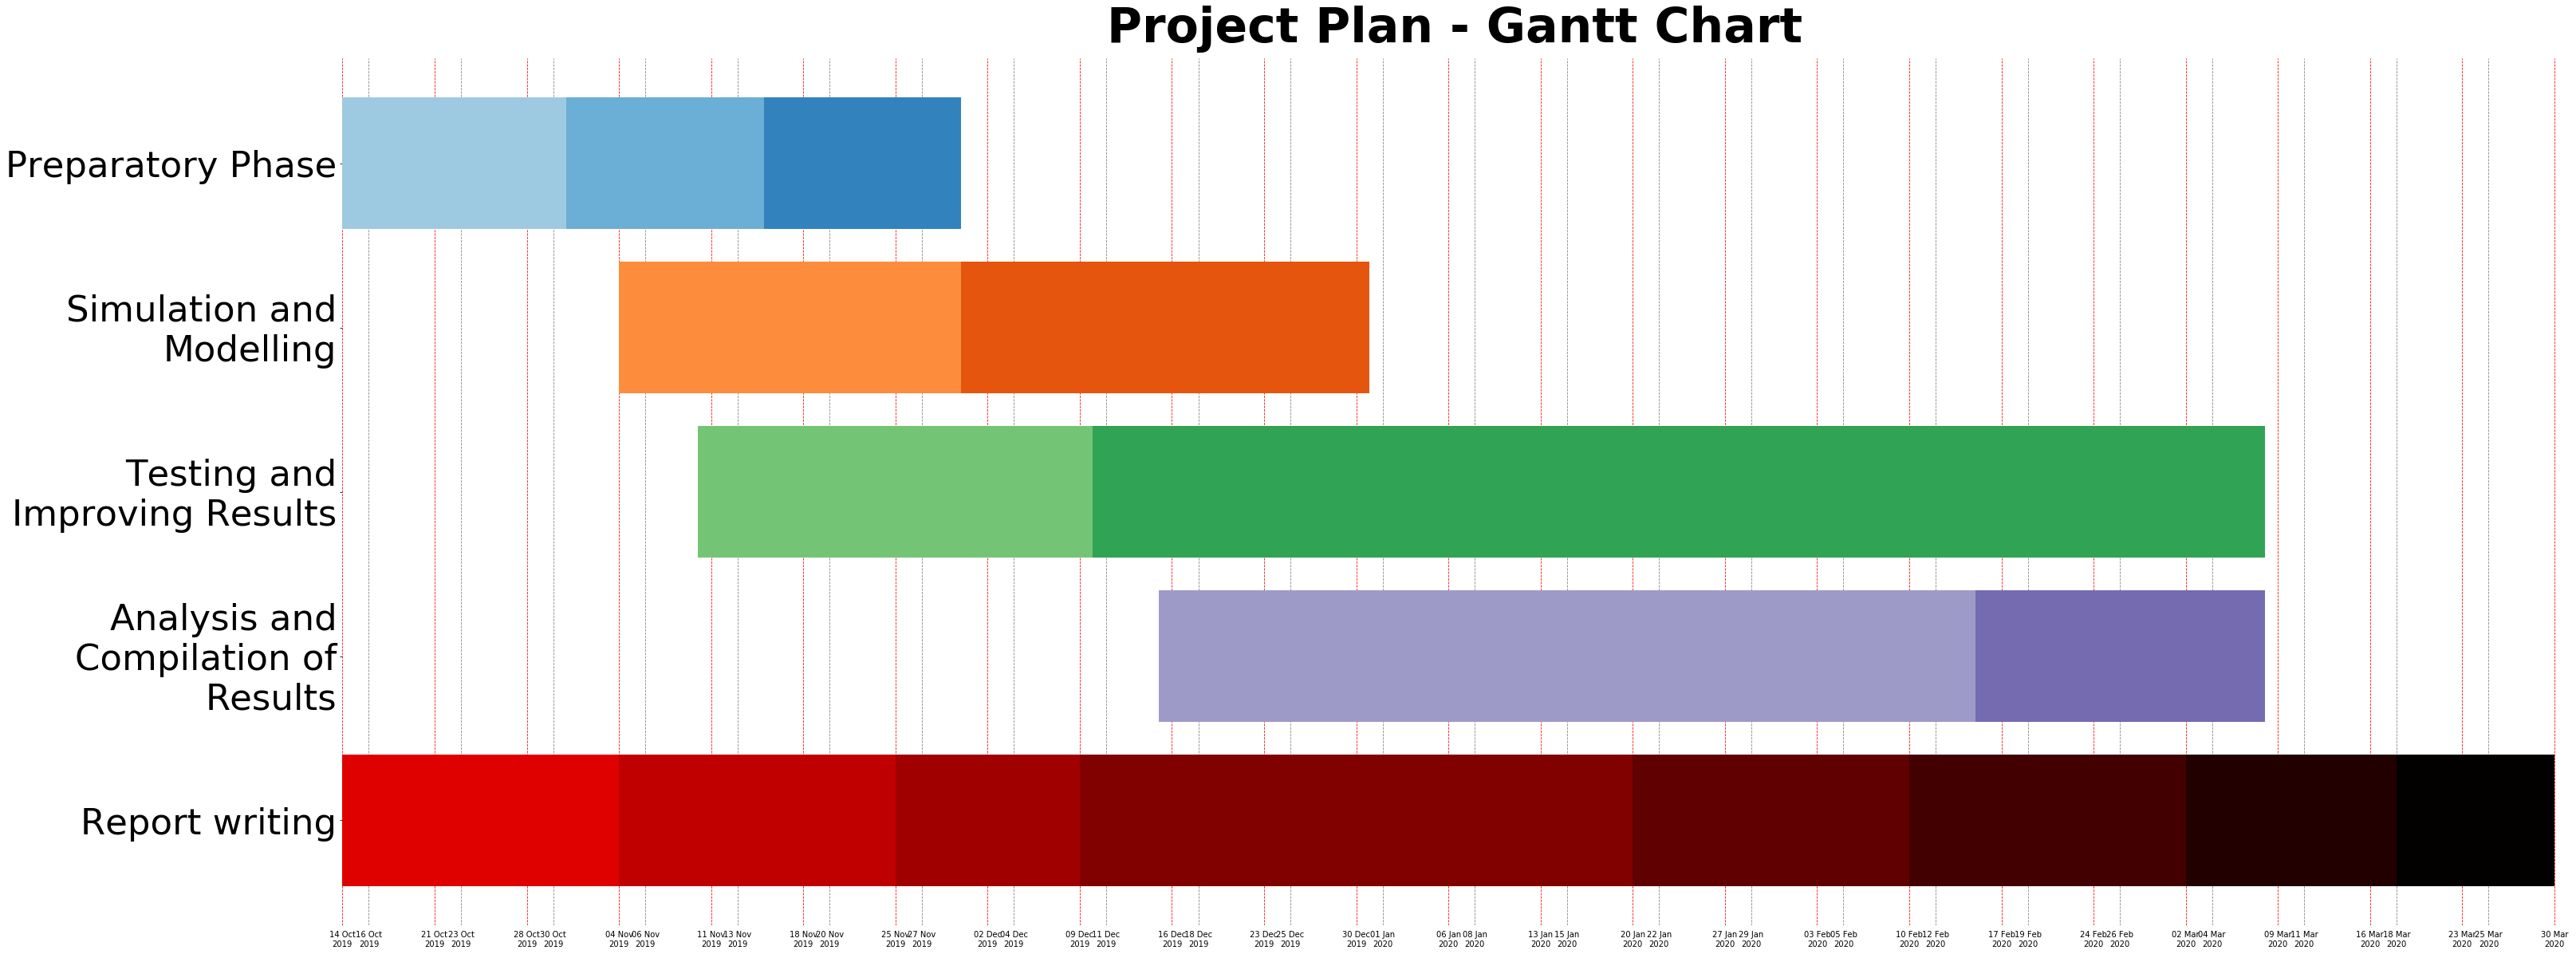

In [35]:
n_y=data['Phase'].nunique()
fig, ax = plt.subplots(figsize=(50,20))
mpl.rcParams['axes.titlepad'] = 20 
ax.set_xlim(737346.0,737515.0)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b\n%Y'))
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(MO,WE)))
ax.set_axisbelow(True)
ax.xaxis.grid(linestyle='dashed')
ax.set_yticks(np.arange(1,n_y+1))
ax.set_yticklabels(data['Phase'].unique()[::-1],fontsize=45)
i = 0
colors = ['red','gray']

#change font to 10
[tick.set_fontsize(10) for tick in ax.xaxis.get_ticklabels()]

#change color to red and gray
[tick.set_color(colors[id%2]) for id,tick in enumerate(ax.get_xgridlines())]


#ax.set_yticklabels(data['Phase'].unique()[::-1],fontproperties=label_prop)

plt.barh(data['y'],data['End Date_mdate']-data['Start Date_mdate'],left=data['Start Date_mdate'],color=clist)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tick_params(top=False, bottom=False, left=True, right=False, labelleft=True, labelbottom=True)
plt.title('Project Plan - Gantt Chart',fontsize=60,fontname='Calibri',fontweight='semibold')
#plt.title('Project Plan - Gantt Chart',fontproperties=title_prop)
#plt.savefig('Images/Output_Image.png')
plt.show()